In [1]:
#%pip install seaborn
#%pip install openpyxl
# %pip install 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import df
#import plotly.express as px
plt.style.use('ggplot')
pd.set_option('display.max_columns',24)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [17]:
data=pd.read_excel(r'C:\Users\Dima\Desktop\Homework\3 курс\ТМО\ЛР1\Superstore.xlsx',sheet_name='Orders', engine='openpyxl')
data.head().style.set_properties(**{"background-color": "#ff8282","color": "black",
                                     "border-color": "black","font-size":"10pt",'width': 200}) 
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0000,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.0000,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.0000,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.4500,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.2000,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Повторная обработка данных

In [5]:
data=data.drop('Row ID',axis=1)

data=data[[ 
        'Order ID', 
        'Order Date', 
        'Ship Date', 
        'Ship Mode', 
    #'Customer ID',
    #'Customer Name', 
        'Segment', 
    #'Country', 
        'City', 
        'State', 
    #'Postal Code',
        'Region', 
    #'Product ID', 
        'Category', 
        'Sub-Category', 
        'Product Name',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]
data.head(3) # final dataframe, after columns were removed

,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0000,41.9136
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.0000,219.5820
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.0000,6.8714


In [6]:
# разработка функций, извлекает конкретные значения данных из столбца `Order Date`, создает новые функции из существующих функций
data['month']=data['Order Date'].dt.month 
data['year']=data['Order Date'].dt.year
data['year_month']=data['Order Date'].dt.to_period('M')
data['total_discount_in_dollars']=data['Sales'] * data['Discount'] # скидка эквивалентна долларам
data['selling_price']=data['Sales'] / data['Quantity'] # рассчитывает отпускную цену для каждого продукта
data['(net)_profit_before_discount']=data['Sales'] * data['Discount'] + data['Profit'] # чистая прибыль до вычета скидки
data['order_fulfillment_time']=data['Ship Date'] - data['Order Date'] # интервал между размещением заказа и отправкой заказа
data['net_profit_per_unit_sold']=data['Profit'] / data['Quantity'] # чистая прибыль, полученная за проданную единицу продукции
data=data.rename(columns={'Profit':'net_profit'}) # переименовывает столбец прибыли в net_profit, более конкретное название
data['profit_margin']=data['net_profit'] / data['Sales'] * 100 # при 25%-ной марже прибыли компания зарабатывает 25 долларов за 1 доллар продажи
data['discounted_sales']=data['Sales'] - (data['Discount']*data['Sales']) # продажи выдержек учитываются с учетом скидки
print('Output dataframe:') # выходные фрейм данные
data.head(5)

Output dataframe:


,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,...,Discount,net_profit,month,year,year_month,total_discount_in_dollars,selling_price,(net)_profit_before_discount,order_fulfillment_time,net_profit_per_unit_sold,profit_margin,discounted_sales
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,...,0.0000,41.9136,11,2013,2013-11,0.0000,130.9800,41.9136,3 days,20.9568,16.0000,261.9600
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,...,0.0000,219.5820,11,2013,2013-11,0.0000,243.9800,219.5820,3 days,73.1940,30.0000,731.9400
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,...,0.0000,6.8714,6,2013,2013-06,0.0000,7.3100,6.8714,4 days,3.4357,47.0000,14.6200
3,US-2012-108966,2012-10-11,2012-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,...,0.4500,-383.0310,10,2012,2012-10,430.9099,191.5155,47.8789,7 days,-76.6062,-40.0000,526.6676
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,...,0.2000,2.5164,10,2012,2012-10,4.4736,11.1840,6.9900,7 days,1.2582,11.2500,17.8944


In [7]:
print('Ниже представлена описательная статистика по числовым данным. Это также может выявить потенциальные ошибки или аномалии в данных.')
data.describe()

Ниже представлена описательная статистика по числовым данным. Это также может выявить потенциальные ошибки или аномалии в данных.


,Order Date,Ship Date,Sales,Quantity,Discount,net_profit,month,year,total_discount_in_dollars,selling_price,(net)_profit_before_discount,order_fulfillment_time,net_profit_per_unit_sold,profit_margin,discounted_sales
count,9994,9994,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994,9994.0000,9994.0000,9994.0000
mean,2013-04-30 19:20:02.401441024,2013-05-04 18:20:49.229537792,229.8580,3.7896,0.1562,28.6569,7.8146,2012.7229,32.2776,60.9196,60.9345,3 days 23:00:46.828096858,7.7994,12.0314,197.5804
min,2011-01-04 00:00:00,2011-01-08 00:00:00,0.4440,1.0000,0.0000,-6599.9780,1.0000,2011.0000,0.0000,0.3360,-3449.9885,0 days 00:00:00,-1319.9956,-275.0000,0.0888
25%,2012-05-23 00:00:00,2012-05-27 00:00:00,17.2800,2.0000,0.0000,1.7288,5.0000,2012.0000,0.0000,5.4700,4.7754,3 days 00:00:00,0.7228,7.5000,14.3360
50%,2013-06-27 00:00:00,2013-06-30 00:00:00,54.4900,3.0000,0.2000,8.6665,9.0000,2013.0000,1.0368,16.2700,14.6352,4 days 00:00:00,2.7670,27.0000,45.9232
75%,2014-05-15 00:00:00,2014-05-19 00:00:00,209.9400,5.0000,0.2000,29.3640,11.0000,2014.0000,14.8704,63.9400,50.3280,5 days 00:00:00,8.7032,36.2500,180.1765
max,2014-12-31 00:00:00,2015-01-06 00:00:00,22638.4800,14.0000,0.8000,8399.9760,12.0000,2014.0000,11319.2400,3773.0800,9508.1616,7 days 00:00:00,1679.9952,50.0000,17499.9500
std,NaN,NaN,623.2451,2.2251,0.2065,234.2601,3.2860,1.1240,164.0256,142.9274,248.7399,1 days 17:55:49.143486104,56.0750,46.6754,539.0453


Столбчатая диаграмма (средние продажи по сегментам)

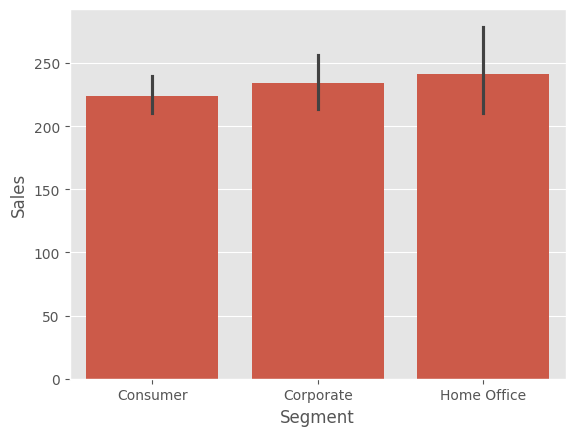

In [8]:
# Каждый столбец на диаграмме представляет собой средние продажи для определенного сегмента.
sns.barplot(x=data['Segment'], y=data['Sales'])
plt.show()

Круговая диаграмма на основе данных категорий товаров

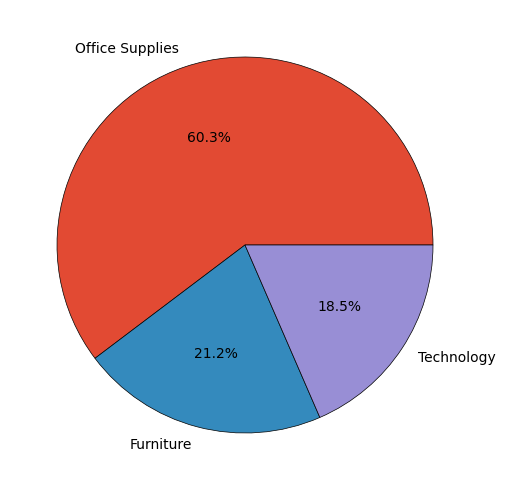

In [9]:
plt.figure(figsize=(8,5))
Category_df = dict(data["Category"].value_counts())
plt.pie(Category_df.values(),labels=Category_df.keys(),wedgeprops={"edgecolor":"black"},autopct="%1.1f%%")
plt.tight_layout()

Столбчатая диаграмма для подсчета количества записей в зависимости от режима доставки товаров

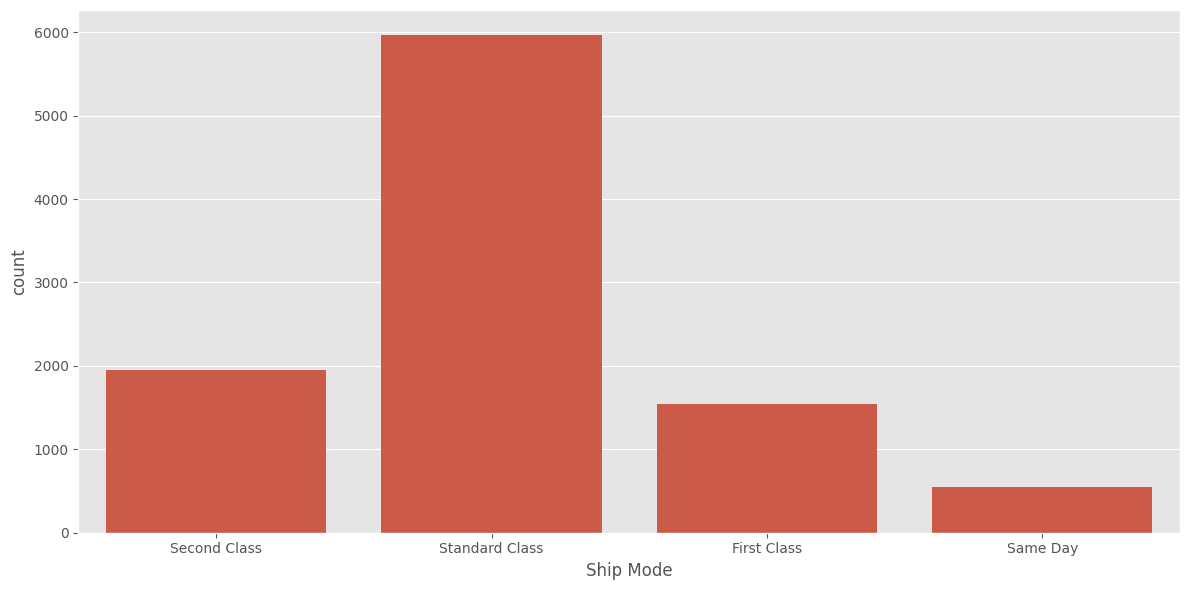

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x=data["Ship Mode"])
plt.tight_layout()

Линейный график для отображения ежемесячной суммы продаж по годам

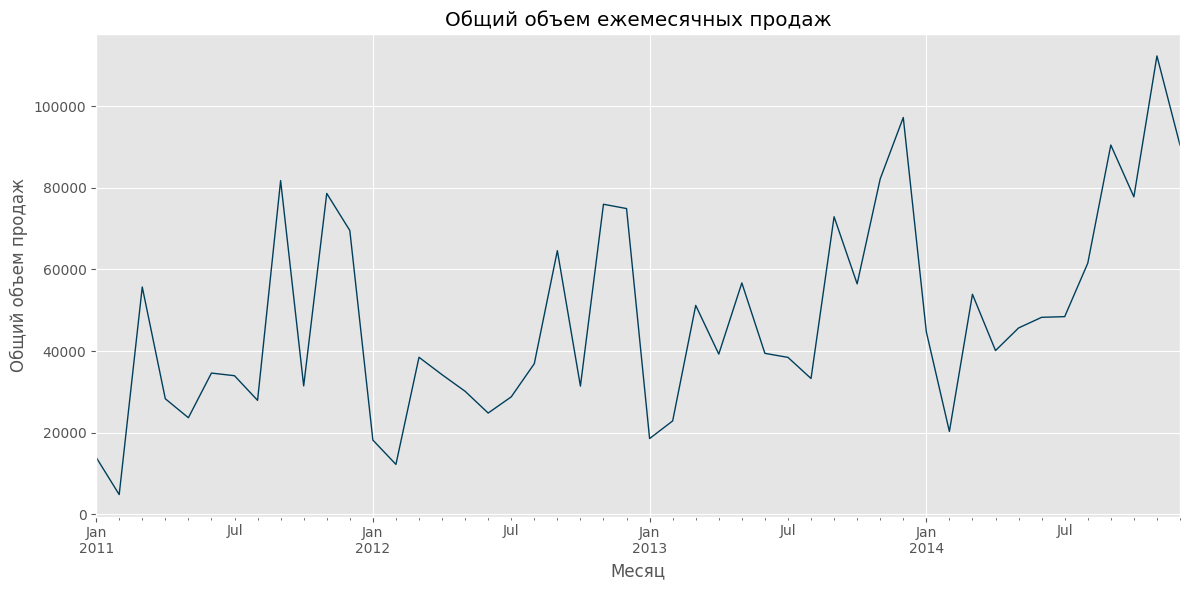

In [11]:
# Каждая точка на графике представляет собой сумму продаж за определенный месяц, сгруппированную по годам.
data.groupby('year_month')['Sales'].sum().plot(c='#003f5c',linewidth=1,figsize=(12,6))
plt.title('Общий объем ежемесячных продаж')
plt.xlabel('Месяц')
plt.ylabel('Общий объем продаж')

plt.tight_layout()
plt.show()

Столбчатая диаграмма, показывающая совокупные ежемесячные продажи

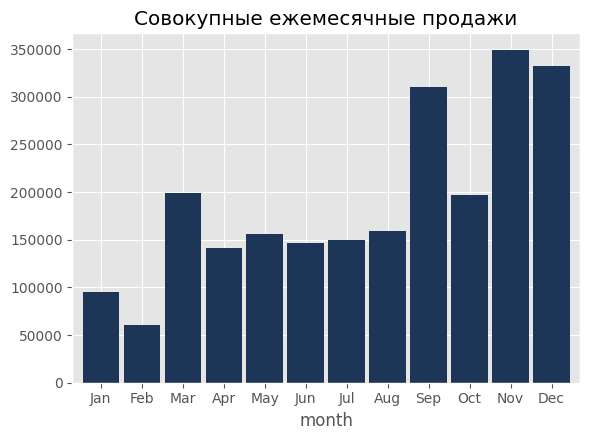

In [12]:
data.groupby('month')['Sales'].sum().plot(kind='bar',color='#1d3557',figsize=(6,4.5),width=.89)
plt.title('Совокупные ежемесячные продажи')
plt.xticks(ticks=np.arange(0,12,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)

plt.tight_layout()
plt.show()

Столбчатая диаграмма, показывающая ежемесячные продажи по подкатегориям товаров, при этом каждый столбец представляет собой отдельную подкатегорию, а разные месяцы выделены разными цветами

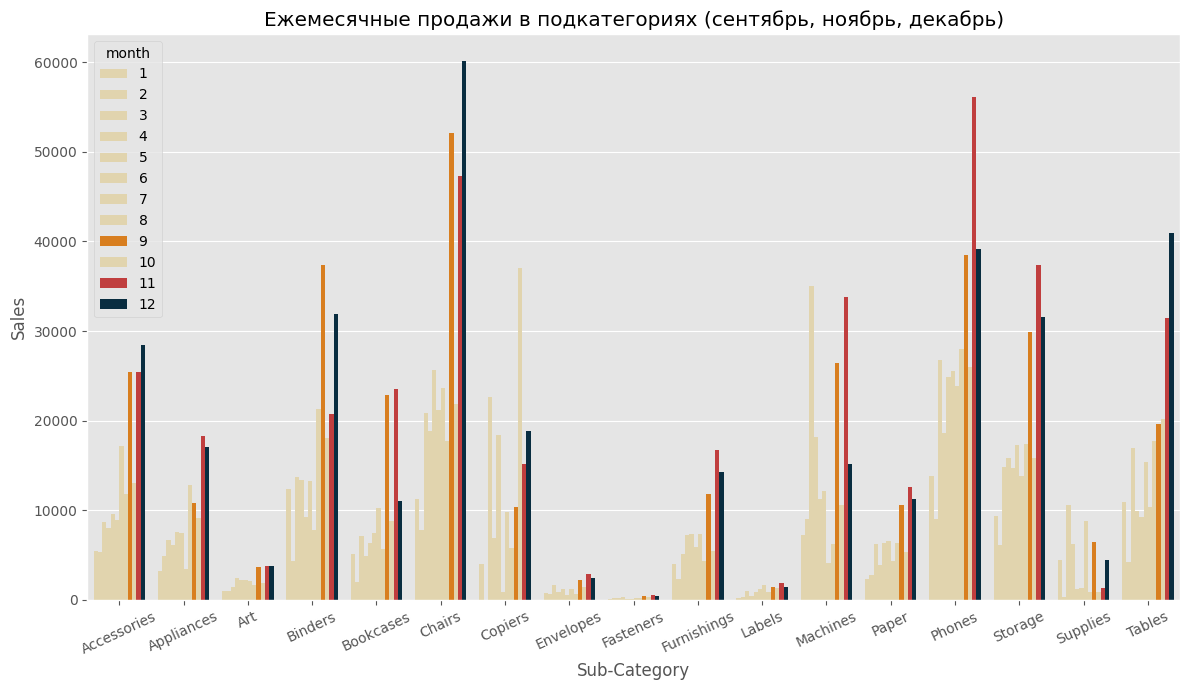

In [13]:
month_subcat=pd.DataFrame(data.groupby(['month','Sub-Category'])['Sales'].sum().reset_index())
month_subcat

plt.figure(figsize=(12,7))
sns.barplot(data=month_subcat,\
            x='Sub-Category',\
            y='Sales',\
            hue='month',\
            palette=['#e9d8a6','#e9d8a6','#e9d8a6',\
                     '#e9d8a6','#e9d8a6','#e9d8a6',\
                     '#e9d8a6','#e9d8a6','#f77f00',\
                     '#e9d8a6','#d62828','#003049'])
# plt.title('Montly Sub-Category Sales (Sept, Nov, Dec)')
plt.title('Ежемесячные продажи в подкатегориях (сентябрь, ноябрь, декабрь)')
plt.xticks(rotation=25)

plt.tight_layout()

Столбчатая диаграмма, показывающая агрегированные ежемесячные продажи в сегменте "Consumer"

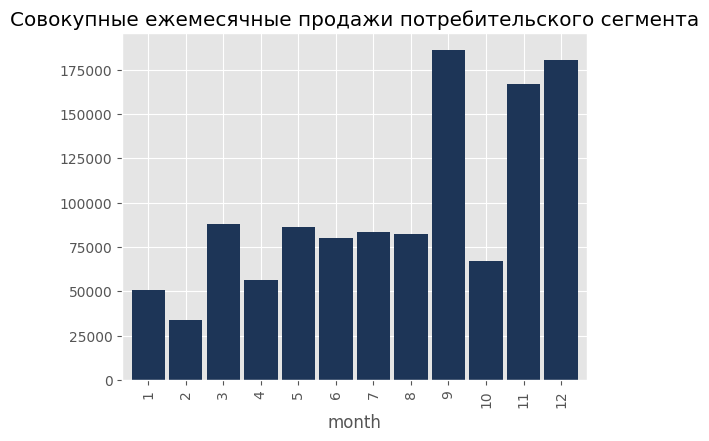

In [14]:
data.query('Segment == "Consumer"').groupby('month')['Sales'].sum().plot(kind='bar',\
                                                                         figsize=(6,4.5),\
                                                                         width=.89,\
                                                                         color='#1d3557')
# plt.title('Consumer Segment Aggregated Monthly Sales')
plt.title('Совокупные ежемесячные продажи потребительского сегмента')
plt.show()

Два графика: 
    1 - показывает среднемесячные продажи
    2 - среднемесячные продажи и их стандартное отклонение

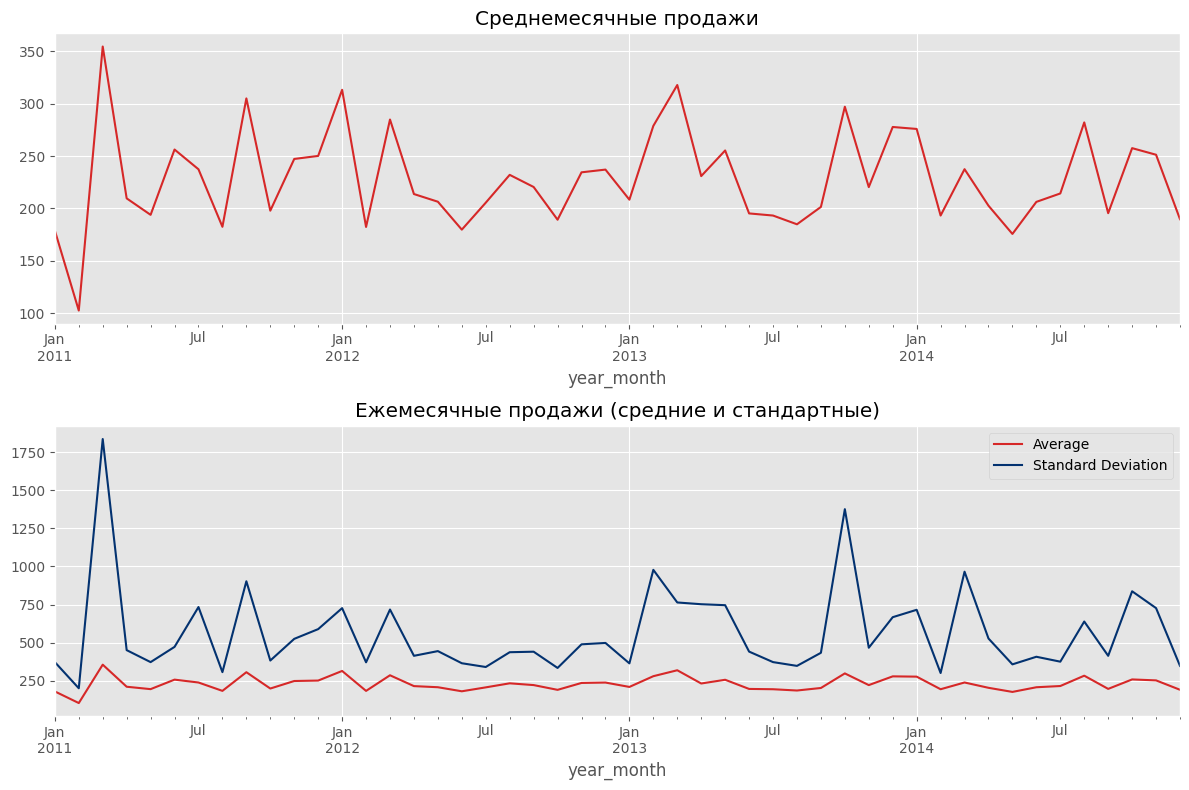

In [15]:
plt.figure(figsize=(12,8))

plt.subplot(211)
data.groupby('year_month')['Sales'].mean().plot(linewidth=1.5,color='#d62828')
plt.title('Среднемесячные продажи')

plt.subplot(212)
data.groupby('year_month')['Sales'].mean().plot(linewidth=1.5,color='#d62828')
data.groupby('year_month')['Sales'].describe()['std'].plot(linewidth=1.5,color='#033270')
plt.title('Ежемесячные продажи (средние и стандартные)')
plt.legend(['Average','Standard Deviation'])

plt.tight_layout()
plt.show()

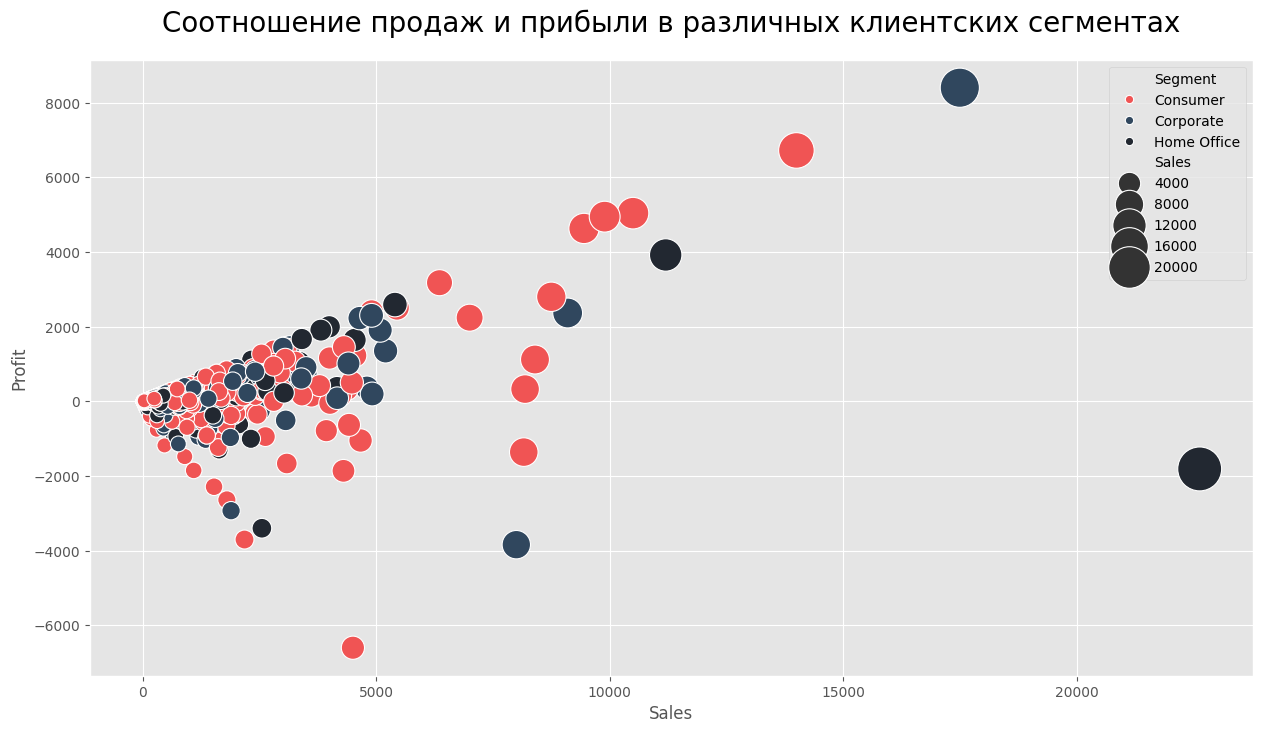

In [18]:
# Again taking a subset of data (To keep things simple)
df_scatter = data[['Sales','Profit','Segment']]

# Visualizing the ScatterPlot
plt.figure(figsize=[15,8])
# Profit in the Y axis, and Sales in the X. Hue will classify the dots according to Segment.
# The size of the dots are according to the volumen of "Sales".
sns.scatterplot(x=df_scatter['Sales'], y=df_scatter['Profit'], hue=df_scatter['Segment'], palette=['#F05454','#30475E','#222831'], size=df_scatter["Sales"], sizes=(100,1000), legend='auto') 
plt.title("Соотношение продаж и прибыли в различных клиентских сегментах", size=20, pad=20)
plt.show()

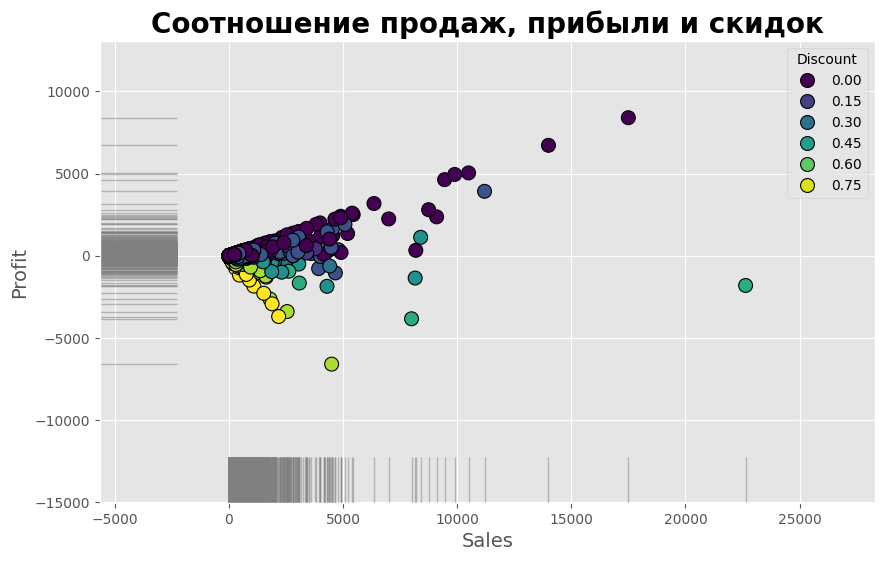

In [ ]:
plt.figure(figsize=(10, 6))

# Используем метод scatter для создания точечного графика
sns.scatterplot(x='Sales', y='Profit', hue='Discount', data=data, palette='viridis', s=100, edgecolor='black')

# Добавляем rug plot для обозначения распределения данных
sns.rugplot(x='Sales', data=data, color='gray', height=0.1, alpha=0.5)
sns.rugplot(y='Profit', data=data, color='gray', height=0.1, alpha=0.5)

# Настраиваем внешний вид графика
plt.title("Соотношение продаж, прибыли и скидок", fontsize=20, fontweight='bold')
plt.xlabel("Sales", fontsize=14)
plt.ylabel("Profit", fontsize=14)

# Отображаем легенду
plt.legend(title='Discount')

# Отображаем график
plt.grid(True)
plt.show()

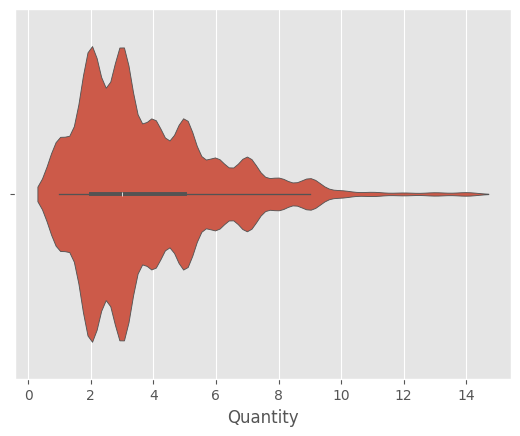

In [19]:

sns.violinplot(x=data['Quantity'])
plt.show()

Два графика: 1 - столбчатая диаграмма для отображения общих продаж по подкатегориям товаров, разделенных по категориям; 2 - столбчатая диаграмма я отображения ежегодных продаж по подкатегориям товаров

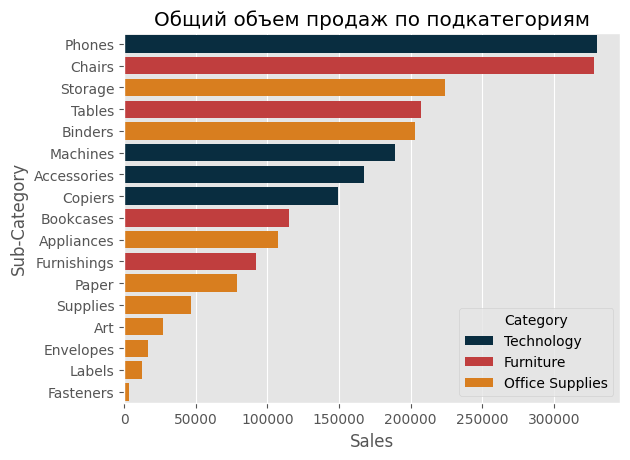

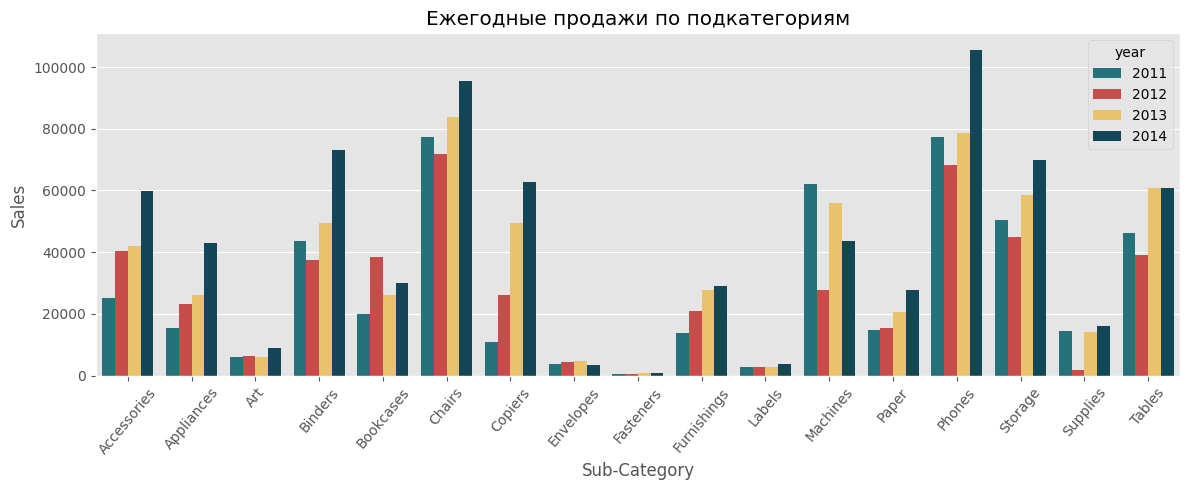

In [ ]:
df_sales=pd.DataFrame(data.groupby(['Category','Sub-Category'])['Sales'].sum()).reset_index().sort_values('Sales',ascending=False)

sns.barplot(x='Sales',y='Sub-Category',data=df_sales,hue='Category',palette=['#003049','#d62828','#f77f00'])
plt.title('Общий объем продаж по подкатегориям')

plt.show()




yearly_sales=pd.DataFrame(data.groupby(['Sub-Category','year'])['Sales'].sum()).reset_index()
yearly_sales

plt.figure(figsize=(12,5))
sns.barplot(data=yearly_sales,x='Sub-Category',y='Sales',hue='year',palette=['#177e89','#db3a34','#ffc857','#084c61'])
plt.xticks(rotation=50)
plt.title('Ежегодные продажи по подкатегориям')

plt.tight_layout()
plt.show()

Годовая средняя ставка роста продаж для каждой подкатегории товаров (в порядке убывания)

In [ ]:
# Каждая строка в DataFrame представляет подкатегорию товаров, а соответствующие значения указывают на среднюю годовую ставку роста продаж для этой подкатегории.
yearly_sales['yearly_growth_rate'] = yearly_sales.groupby('Sub-Category')['Sales'].pct_change() * 100
print('Среднегодовой темп роста продаж:')
pd.DataFrame(yearly_sales.groupby('Sub-Category')['yearly_growth_rate'].mean().sort_values(ascending=False))

Среднегодовой темп роста продаж:


,yearly_growth_rate
Sub-Category,
Supplies,185.7423
Copiers,85.8547
Appliances,42.8799
Accessories,36.1576
Furnishings,29.4793
Bookcases,24.9344
Paper,24.1187
Binders,21.9130
Art,16.1833


Корреляционная матрица

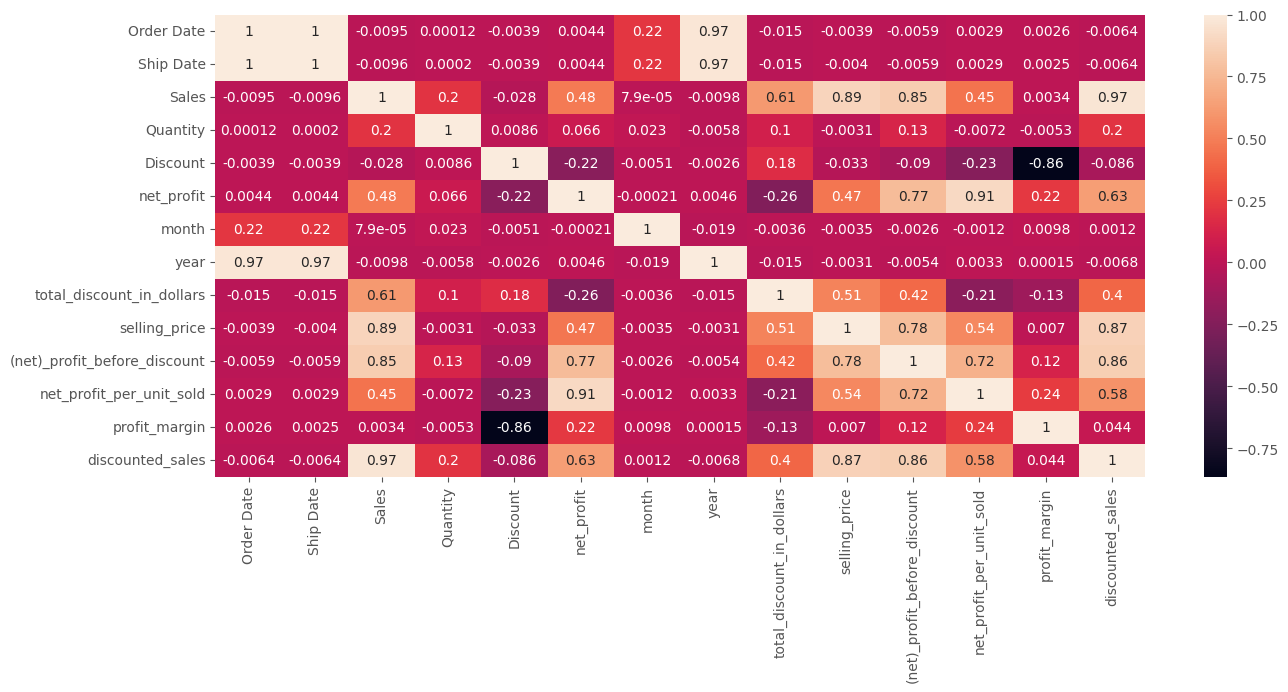

In [ ]:
# Каждая ячейка тепловой карты представляет коэффициент корреляции между соответствующими столбцами.
# Величина и цвет ячейки указывают на силу и направление корреляции: положительная корреляция показывается более светлым цветом, а отрицательная - более темным.
# Значения корреляции от -1 до 1, где 1 означает полную положительную корреляцию, -1 - полную отрицательную корреляцию, а 0 - отсутствие корреляции.
df3 = data
columns_to_remove = df3.select_dtypes(['period[M]', 'timedelta64[ns]', 'object']).columns
df3 = df3.drop(columns=columns_to_remove)
plt.figure(figsize=(15,6))
sns.heatmap(df3.corr(), annot=True)
plt.show()